# Funnel Analysis 

## Overview
We don't have real longitudinal data, but we have a way of creating a proxy for the same sort of insight. There are questions related to: 
* longevity: how long been using mobile money
* frequency: how often uses mobile money
* recency: how recently used mobile money

Intuitively, we can imagine cases where individuals learned about mobile money a long time ago (exposure), signed up (enrollment), used the services regularly (engagement) and continue to do so (retention).

In this funnel analysis, we see these as progressive steps (e.g.. "out of those who have heard of mobile money, how many have an account?"... "Out of those that have a mobile money account, how many use mobile money services regularly"). We treat each step as a binary classification problem, and try to find those features and demographics that are predictive of progressing "to the next stage" of the funnel.

## Data Sources

The data source is the Financial Inclusion Insights Data (<a href="http://finclusion.org/about/">http://finclusion.org/about/</a>). 
 
  * We consider responses from Uganda, Kenya, and Tanzania, the countries of interest for this project
  * We consider only "wave 3" questions that relate to these concepts.
  * Wave 3 surveys were conducted in 2015

The source data is in Microsoft XLSX format. Preprocessing steps include format conversion from XLSX to CSV, merging columns for those survey responses that are identical across all countries, and renaming columns to a human readable format. For example: 

`'MM9' --> 'how_long_using_mobile_money'`


## Survey questions

We have selected Wave 3 questions that relate to the concepts of interest. We have also broken down survey responses to separate usage of mobile money into "basic" and more "sophisticated" categories, where the former ("basic services") is mostly transferring money, and the later ("sophisticated services") includes activities like long-term savings and insurance.

Concepts: 
 Exposure
 Enrollment
 Usage of basic financial services
 Usage of sophisticated financial services
 Recency
 Longevity
 Frequency
 (Retention)
 
The specific questions and responses considered to address each of these concepts are detailed below in the corresponding sections. 

## Funnel Analysis

[Describe the funnel path and flow] 

[Describe what attributes of respondants are examined at each step] 

## Results and further information

[available in the project deliverable report] 


# --------------------

In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
"""
## Load Data

 
"""
input_data_dir = 'Data/'
# os.listdir(input_data_dir)
df = pd.DataFrame.from_csv(
    os.path.join(input_data_dir, 'merged_fii_data_wave3_20160915.csv'),
)

In [4]:
df.head()

,country,year_of_birth,gender,marital_status,education_level,heard_of_mobile_money,biggest_challenge_with_mobile_money,reason_never_used_mobile_money,ever_used_mobile_money_for|deposit,ever_used_mobile_money_for|paygovt,...,last_time_financial_activity_using_account|serv2,last_time_financial_activity_using_account|serv3,last_time_financial_activity_using_account|serv4,last_time_financial_activity_using_account|serv5,last_time_financial_activity_using_account|serv6,last_time_financial_activity_using_account|serv7,last_time_financial_activity_using_account|serv8,last_time_financial_activity_using_account|serv9,how_long_using_mobile_money,source_filename
0,nigeria,1993.0,2,1,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
1,nigeria,1989.0,1,5,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
2,nigeria,1985.0,2,1,5,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
3,nigeria,1995.0,1,1,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
4,nigeria,1998.0,1,1,4,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv


In [5]:
print "total respondants by country"
n_records = dict()
for k,v in df.country.value_counts().iteritems():
    n_records[k] = float(v)  # make float for division norms later
print n_records

total respondants by country
{'kenya': 2994.0, 'nigeria': 6001.0, 'tanzania': 3001.0, 'uganda': 3000.0}


## Demographic information

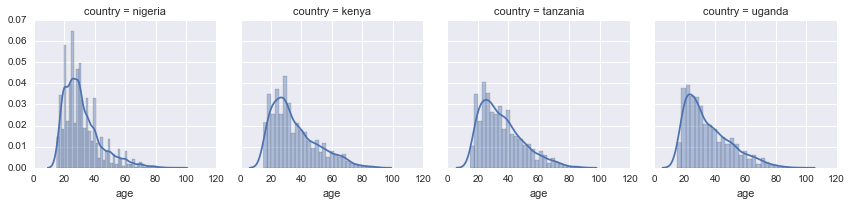

In [6]:
"""
age of respondants
DG1 : Year of birth UT
"""
# survey year is 2015
survey_year = 2015
df['age'] = survey_year - df.year_of_birth

# # plot for all ages
# ax = sns.distplot(df.age.dropna(), bins=30)
# ax.set_title('Age of all respondants')

# plot age by country
g = sns.FacetGrid(df, col="country")
g = g.map(sns.distplot, 'age', )

In [7]:
"""
Gender
DG2 : male/female (observed) UT
1 male
2 female
"""
# convert gender to categorical
df.gender[df.gender==1] = 'male'
df.gender[df.gender==2] = 'female'

col = 'gender'

# plot for all ages
grp = df.groupby(by='country')[col].value_counts()

# normalize
dat = grp\
    .unstack()\
    .apply(lambda x: [(count / n_records[country]) for country, count in x.iteritems()])
dat
#ax = sns.distplot(df.gender.dropna(), bins=30)
#ax.set_title('Age of all respondants')


/home/aman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


gender,female,male
country,,
kenya,0.611890,0.388110
nigeria,0.429262,0.570738
tanzania,0.507164,0.492836
uganda,0.651667,0.348333


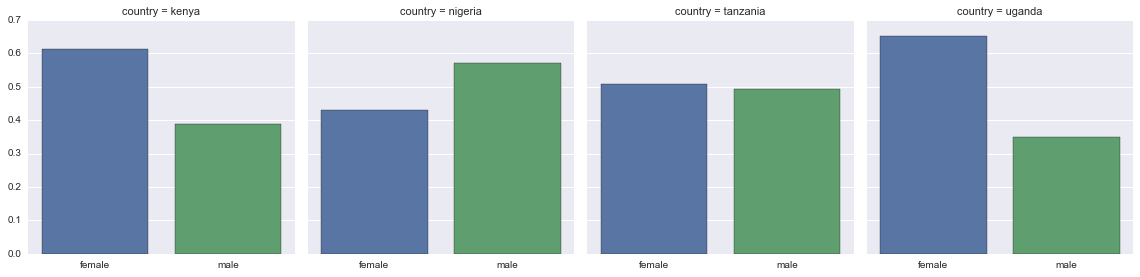

In [45]:
# plotting ratio by country
# use dat
sns.factorplot(data=dat.reset_index(), col='country', 
               kind='bar', 
               #set_ylim=(0,1), 
               #name='a'
              )

# plotting value by country
# use df
#sns.countplot(x='country', hue='gender', data=df)

In [74]:
dat = df[[col, 'country']]
rename_map = {
    1: 'No formal education',
    2: 'Primary education not complete',
    3: 'Primary education complete',
    4: 'Some secondary',
    5: 'Secondary education complete',
    6: 'Some secondary vocational training / some certificate',
    7: 'Secondary vocational training complete / certificate complete',
    8: 'Some diploma',
    9: 'Diploma complete',
    10: 'Some college/university',
    11: 'Complete university degree',
    12: 'Post-graduate university degree',
    13: 'Koranic school',
    14: 'Other',
    15: 'DK/Refused',
    }


/home/aman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


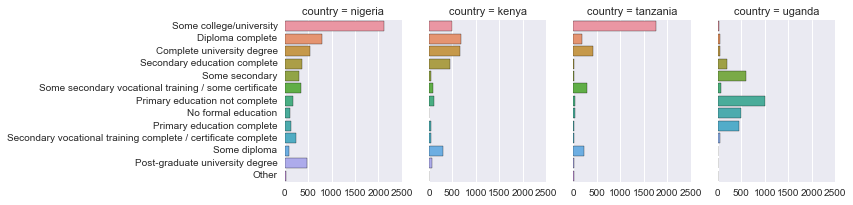

In [111]:
"""
Education level
----
DG4 : education level UT
1  No formal education
2  Primary education not complete
3  Primary education complete
4  Some secondary
5  Secondary education complete
6  Some secondary vocational training / some certificate
7  Secondary vocational training complete / certificate complete
8  Some diploma
9  Diploma complete
10 Some college/university
11 Complete university degree
12 Post-graduate university degree
13 Koranic school
14 Other
15 DK/Refused
"""

col = 'education_level'

# rename
dat = df[[col, 'country']]
rename_map = {
    1: 'No formal education',
    2: 'Primary education not complete',
    3: 'Primary education complete',
    4: 'Some secondary',
    5: 'Secondary education complete',
    6: 'Some secondary vocational training / some certificate',
    7: 'Secondary vocational training complete / certificate complete',
    8: 'Some diploma',
    9: 'Diploma complete',
    10: 'Some college/university',
    11: 'Complete university degree',
    12: 'Post-graduate university degree',
    13: 'Koranic school',
    14: 'Other',
    15: 'DK/Refused',
    }
dat['education'] = dat[col].apply(lambda x: rename_map[x])

# counts
#dat[col].value_counts()

def funcplot(data, color):
    sns.countplot(data=data, y='education')

# plotting value by country
g = sns.FacetGrid(data=dat, col="country")
#g.map(sns.countplot, 'education')
p = g.map_dataframe(funcplot)
#g.set_xticklabels(rotation=30)
p

/home/aman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


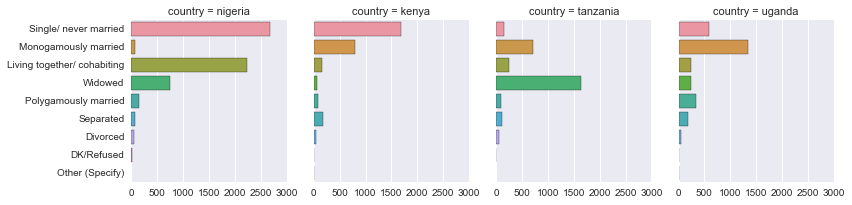

In [112]:
"""
Marital Status

DG3 : marital status UT
1  Single/ never married
2  Polygamously married
3  Monogamously married
4  Divorced
5  Separated
6  Widowed
7  Living together/ cohabiting
8  Other (Specify)
9  DK/Refused

"""


col = 'marital_status'

# rename
dat = df[[col, 'country']]
rename_map = {
    1: 'Single/ never married',
    2: 'Polygamously married',
    3: 'Monogamously married',
    4: 'Divorced',
    5: 'Separated',
    6: 'Widowed',
    7: 'Living together/ cohabiting',
    8: 'Other (Specify)',
    9: 'DK/Refused',
    }
dat[col] = dat[col].apply(lambda x: rename_map[x])

def funcplot(data, color):
    sns.countplot(data=data, y=col)

# plotting value by country
g = sns.FacetGrid(data=dat, col="country")
p = g.map_dataframe(funcplot)
p

## Funnel step: Exposure

Survey Questions: 

 * MM1. Have you ever heard of something called Mobile Money? 

```
'MM1'  : 'heard_of_mobile_money',
1 Yes
2 No
```

In [ ]:
col = 'heard_of_mobile_money'

In [119]:
# overall breakdown
df[col].value_counts()

1    8580
2    6416
Name: heard_of_mobile_money, dtype: int64

In [118]:
grp = df.groupby(by='country')[col].value_counts()

# normalize
dat = grp\
    .unstack()\
    .apply(lambda x: [(count / n_records[country]) for country, count in x.iteritems()])

# answers
dat.columns = ['% yes', '% no']
dat

,% yes,% no
country,,
kenya,0.742151,0.257849
nigeria,0.157974,0.842026
tanzania,0.886371,0.113629
uganda,0.916667,0.083333


In [ ]:
Wave 3 questions (Uganda, Kenya, Tanzania) questions that relate to these concepts.

Exposure:
MM1. Have you ever heard of something called Mobile Money? 

Enrollment:
MM4. Have you ever used this mobile money service for any financial activity?
MM6_n Do you have a registered account (account registered in your name) with [any] mobile money service?
+ no answer for MM12 What is the main reason you have never used mobile money services?

Usage of Basic Financial Services 
MM15. Have you ever used a mobile money account to do [any of] the following [basic services]?
[1-2] deposit, withdraw
[3-10] pay bills
[11 - 12] Send, Receive money

Usage of sophisticated financial services
MM15. Have you ever used a mobile money account to do [any of] the following [sophisticated financial services]?
  [16] Insurance
  [18, 19, ] long term savings
  [20, ] emergency funds
  [17] large transactions, regular transactions (like loans, mortgage)

Recency:
User has used mobile financial services in the recent path
MM5_n. Apart from today, when was the last time you conducted any financial activity with [any] mobile money service?
MM8_n. Apart from today, when was the last time you conducted any financial activity using these registered accounts?

Longevity
learned about / signed up for financial services some time ago
MM9 For how long have you been using mobile money services?

Frequency
Uses financial services regularly / frequently
MM17. How often do you use mobile money for [any] activity?
[could break this down into basic and sophisticated financial activities as well] 

Retention

